# Data Wrangling of Uber Dataset
## Name: Sohail Sankanur

# Task1: Cleaning a Dirty Dataset

In this assignment our main task is to clean the data file which is given to us. The data file which is given to us is in csv format and is an Uber dataset. There are mistakes in the dataset which we have to identify and correct. Data cleaning is a very important part of data analytics and in this assignment we are performing various methods of pre processing to clean the uber dataset.

##  Importing pandas and reading the dataset into a dataframe

In this part of the code we perform the first task which is to read the dataset from the file which is given to us and store it in a dataframe for analysis and modifications. We do this task using the pandas library. As seen pandas has a method named read_csv which we use for reading contents of the csv file.

In [1]:
#this part of the code is to read the data from the file so that we could correct it
import pandas as pd
df = pd.read_csv('29996368_dirty_data.csv')
print("Number of rows in the table is: ",len(df))
df.head()

Number of rows in the table is:  310


,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3926512548,1,7,2,-37.861835,144.905716,-37.824373,144.952511,8304.0,2018-02-03,17:12:43,2929.02,18:01:32,27.66
1,ID5632779567,2,2,1,-37.823915,144.929916,-37.813703,144.953459,3408.0,2018-01-04,19:12:05,881.64,19:26:46,106.43
2,ID1815008795,0,1,9,-37.812248,144.957594,-38.110916,144.654173,43128.0,2018-06-24,12:22:20,10438.14,15:16:18,19.93
3,ID5666968193,2,5,9,-37.804927,144.939491,-38.110916,144.654173,43455.0,2018-01-20,17:27:50,10437.48,20:21:47,1031.39
4,ID3141351739,1,1,7,-37.812067,144.938196,-37.861835,144.905716,10817.0,2018-01-16,17:22:34,3501.60,18:20:55,24.35


As seen we have produced an output of the total number of rows in the dataset and also 5 records have been printed as an output for obtaining a basic understanding of the dataframe. As seen there are 310 rows in the total dataframe.

## Column 1: ID

As seen from the dataframe print we can see that the first column of the dataset is the ID of the ride which is taken. Now we check weather each ride has a unique ID as two rides cannot have the same ID's. We put all the unique ID's fromt the dataset into a list using a built in function and then we check the length of this list.

In [2]:
print("Total number of unique ID's is: ",len(df['Unnamed: 0'].unique()))

Total number of unique ID's is:  310


As seen the length of the list is 310 and there are a total of 310 records in the dataframe which means that each row would have a unique ID. Hence there is no problem in the Column 1.

## Column 2: Uber Type

It is given that there are three types of uber rides a customer can take namely Uber Pool, UberX and Uber Luxury. Hence if we assign labels to the types of the ride we can tell that there would be three labels namely 0,1,2. Now lets check all the unique labels from the dataset.

In [3]:
print(df['Uber Type'].unique())

[1 2 0 3]


As seen there are four labels hence all the records with the Uber Type as 3 can be considered as faulty data. Lets see all the records with faulty Uber type.

In [4]:
df[df['Uber Type'] == 3]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
154,ID3137265781,3,1,6,-37.810793,144.944783,-37.790797,144.985865,6088.0,2018-04-03,10:39:46,1723.14,11:08:29,11.60
156,ID3112647128,3,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-05-21,17:12:34,12681.06,20:43:55,68.69
157,ID1400540044,3,7,5,-37.861835,144.905716,-37.799903,144.927629,11671.0,2018-04-03,21:15:42,3691.26,22:17:13,13.80
162,ID1550235666,3,3,5,-37.816808,145.007359,-37.807829,144.934073,7142.0,2018-05-24,03:46:38,1822.14,4:17:00,11.21


As seen there are four records with faulty Uber type. Now we have to correct the Uber Type in the dataframe.

If we observe the dataset ID and the Uber Type we can get a relation between the two. As seen if the third character of the ID and Uber type of each ride is taken we can get a relation between them. If the character from the ID is 3 we get a Uber Type as 1 and if the character is 5 we get a Uber Type as 2 and if the Character in the ID is 1 we get Uber type as 0.

Hence we can tell that by taking the third character of the ID and by doing an integer division by 2 we would get the the value for the Uber Type.

In [5]:
# this part of the code is to correct the uber type in the data 
for i in range(0,len(df)):
    if df['Uber Type'][i] == int(df['Unnamed: 0'][i][2])//2:
        continue
    else:
        df['Uber Type'][i] = int(df['Unnamed: 0'][i][2])//2  # performing integer division by 2 to obtain Uber Type Value

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df[df['Uber Type'] == 3]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


## Column 5 & 7: Origin and Destination Latitude

Now we have to identify if the Origin Latitude of all the Uber rides has any kinds of errors and faults.

In [7]:
df['Origin Latitude'].describe()

count    310.000000
mean     -36.624903
std        9.569615
min      -38.110916
25%      -37.825509
50%      -37.815549
75%      -37.805927
max       38.110916
Name: Origin Latitude, dtype: float64

As seen after doing a describe on the Origin Latitude Column we can see that majorit of the values lie between the -37 nd -38 range and the mean is also in this range hence we can say that maximum of the latitudes lie in this range. However as seen the maximum value if 38 which shows us there is possibility of error in this column.

If searched online we can see that Australia has a latitude range of -25 to -40. Which meand is the latitude is around 38 then this would not be in Australia. Hence to see the rows with wrong latitude values let us print all the rows with Origin Latitudes which are not in the Australia Latitude ranges.

In [8]:
df[(df['Origin Latitude'] > -25) | (df['Origin Latitude'] < -40)]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
72,ID5467028586,2,9,1,38.110916,144.654173,-37.813234,144.962719,43410.0,2018-07-16,15:34:53,10432.26,18:28:45,1024.12
73,ID1527674449,0,4,2,37.816631,145.007369,-37.824036,144.943603,6267.0,2018-03-04,19:03:12,1507.80,19:28:19,14.69
74,ID1264767453,0,5,3,37.809799,144.935966,-37.825145,144.993392,5899.0,2018-04-24,20:02:51,1506.24,20:27:57,9.26
75,ID1603832179,0,9,5,38.110916,144.654173,-37.802819,144.936395,43818.0,2018-01-14,02:12:24,10545.54,5:08:09,23.00
76,ID3122723693,1,9,2,38.110916,144.654173,-37.817250,144.934061,43041.0,2018-02-03,18:54:21,10380.66,21:47:21,61.29


similarly by looking into the Destination Latitude using describe we get the output as follows

In [9]:
df['Destination Latitude'].describe()

count    310.000000
mean     -36.626845
std        9.554914
min      -38.110916
25%      -37.823863
50%      -37.813826
75%      -37.803944
max       38.110916
Name: Destination Latitude, dtype: float64

As seen this is almost the same as the Arrivel Latitude now by applying the range and obtaining the false records we would get

In [10]:
df[(df['Destination Latitude'] > -25) | (df['Destination Latitude'] < -40)]

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
81,ID3266663299,1,4,3,-37.808730,145.004482,37.820169,144.978938,3613.0,2018-01-08,09:13:00,911.82,9:28:11,9.10
85,ID3287498482,1,1,9,-37.803909,144.957357,38.110916,144.654173,47405.0,2018-02-12,00:44:05,11669.22,3:58:34,68.88
88,ID1142433511,0,4,5,-37.800841,145.014854,37.811435,144.935431,8182.0,2018-03-26,07:17:10,2152.56,7:53:02,4.85
91,ID3210440527,1,9,3,-38.110916,144.654173,37.825246,144.980613,45521.0,2018-04-28,15:00:54,10986.12,18:04:00,63.95
92,ID1357884483,0,7,8,-37.861835,144.905716,37.807202,145.026637,13986.0,2018-01-10,01:36:25,4292.40,2:47:57,13.25


As seen from the output all the latitude values are between the range 25 and 40 which is the Australia Latitude range except it is positive. Hence we can infer from this that maybe the mistake is just the negative sign in this data for the Origin Latitude. Hence to correct this we would just multiply the Origin Latitude by -1 if they are positive.

In [11]:
# this is to get the destination latitude and the destination longitude right

for i in range(0,len(df)):
    if df['Origin Latitude'][i] > 0:
        df['Origin Latitude'][i] = df['Origin Latitude'][i] * -1 
    if df['Destination Latitude'][i] > 0:
        df['Destination Latitude'][i] = df['Destination Latitude'][i] * -1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Column 6 & 8: Origin and Destination Longitude

Now using the descibe method we can see the mathematical parameters for the Origin and Destination Longitudes

In [12]:
df['Origin Longitude'].describe()

count    310.000000
mean     144.930691
std        0.107409
min      144.654173
25%      144.918955
50%      144.957475
75%      144.985865
max      145.046450
Name: Origin Longitude, dtype: float64

In [13]:
df['Destination Longitude'].describe()

count    310.000000
mean     144.930163
std        0.108233
min      144.654173
25%      144.928059
50%      144.953272
75%      144.985967
max      145.046450
Name: Destination Longitude, dtype: float64

As seen by looking at the mathematical description of the longitudes we can see that most of the values lie in the 140 to 145 range and the in and max values also lie in this range. Thus by looking at this we can say that there is no error in the Arrival and Destination Longitudes. Also the Australia region has longitude which ranges between 140 and 150 and hence the data can be considered as correct.

## Column 10: Departure Date

In [14]:
print("some of the faulty dates are:")
for i in range(0,len(df)):
    dateelems = df['Departure Date'][i].split("-")
    if int(dateelems[1]) > 12 and int(dateelems[2]) < 12:
        print(df['Departure Date'][i])
    if int(dateelems[1])==2 and int(dateelems[2])>28:
        print(df['Departure Date'][i])

some of the faulty dates are:
2018-28-02
2018-23-04
2018-15-01
2018-13-04
2018-20-01
2018-17-06
2018-02-30
2018-02-30


As seen we have some faulty dates in the dataset and these have to be corrected. 

As seen from the above data we can see that the date which should be in yyyy-mm-dd format has an interchanged format. Thus this has to be corrected by swapping of the date and the month sections. Also we can see that for february in some of the dates there is a day which is 30 which is not possible as february has only 28 days. Hence this is corrected by taking the nearest possible date.

In [15]:
# this is for correction of the date in the dataframe
for i in range(0,len(df)):
    dateelems = df['Departure Date'][i].split("-")
    if int(dateelems[1]) > 12 and int(dateelems[2]) < 12:
        dateelems[1],dateelems[2] = dateelems[2],dateelems[1]
    if int(dateelems[1]) == 1 or int(dateelems[1]) == 3 or int(dateelems[1]) == 5 or int(dateelems[1]) == 7 or int(dateelems[1]) == 8 or int(dateelems[1]) == 10 or int(dateelems[1]) == 12:
        if int(dateelems[2]) > 31:
            dateelems[2] = str(31)
    if int(dateelems[1]) == 4 or int(dateelems[1]) == 6 or int(dateelems[1]) == 9 or int(dateelems[1]) == 11:
        if int(dateelems[2]) > 30:
            dateelems[2] = str(30)
    if int(dateelems[1]) == 2:
        if int(dateelems[2]) > 28:
            dateelems[2] = str(28)
    final_date = dateelems[0]+"-"+dateelems[1]+"-"+dateelems[2]
    if final_date != df['Departure Date'][i]:
        df['Departure Date'][i] = final_date

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Column 9 & 12: Journey Distance(m) and Travel Time(s)

In the dataset which is given there are some mistakes in the Journey Distance. We find the journey distance using Dijkstra's algorithm. In this task we are provided with 2 files named nodes.csv and edges.csv. Using this files and the Dijkstra's algorithm we can find the journey distance

Our first step is to load the two files into saperate dataframes. This is done using the pandas library

In [16]:
# firstly we read the nodes.csv file and the edges.csv file into python

df_nodes = pd.read_csv('nodes.csv')
df_edges = pd.read_csv('edges.csv')
df_nodes.head()

,Unnamed: 0,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


Now after the two files have been loaded into saperate dataframes we now have to merge the dirty_data file with the dataframe derived from nodes.csv. The join is done with the latitude and longitude of both the origin and the destination.

In [17]:
df_merge = pd.merge(df,df_nodes, how = 'left', left_on=['Origin Latitude','Origin Longitude'], right_on=['lat','lon'])

In [18]:
df_merge = pd.merge(df_merge,df_nodes, how = 'left', left_on=['Destination Latitude','Destination Longitude'], right_on=['lat','lon'])

In [19]:
df_merge.head()

,Unnamed: 0_x,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Unnamed: 0_y,lat_x,lon_x,Unnamed: 0,lat_y,lon_y
0,ID3926512548,1,7,2,-37.861835,144.905716,-37.824373,144.952511,8304.0,2018-02-03,17:12:43,2929.02,18:01:32,27.66,1390575046,-37.861835,144.905716,591233716,-37.824373,144.952511
1,ID5632779567,2,2,1,-37.823915,144.929916,-37.813703,144.953459,3408.0,2018-01-04,19:12:05,881.64,19:26:46,106.43,1466671807,-37.823915,144.929916,163389490,-37.813703,144.953459
2,ID1815008795,0,1,9,-37.812248,144.957594,-38.110916,144.654173,43128.0,2018-06-24,12:22:20,10438.14,15:16:18,19.93,6167489373,-37.812248,144.957594,5002706670,-38.110916,144.654173
3,ID5666968193,2,5,9,-37.804927,144.939491,-38.110916,144.654173,43455.0,2018-01-20,17:27:50,10437.48,20:21:47,1031.39,579989632,-37.804927,144.939491,5002706670,-38.110916,144.654173
4,ID3141351739,1,1,7,-37.812067,144.938196,-37.861835,144.905716,10817.0,2018-01-16,17:22:34,3501.60,18:20:55,24.35,634775008,-37.812067,144.938196,1390575046,-37.861835,144.905716


After joining the tables we get the above table as the output.

Now are next step would be to create a plot using the networkx package. Using this package we create the plot of the nodes.

In [20]:
import networkx as nx
Plot = nx.from_pandas_edgelist(df_edges,'u','v',['distance(m)'])

After this we create a function named traveltime. This function is used for calculation of the time for travelling from one node to another

In [21]:
def traveltime(path, edges):
    traveltime = 0
    for i in range(len(path)-1):
        traveltime = traveltime + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)

    return traveltime

Now we use the dijkstra's algorithm to find the shortest path between any 2 given nodes. This would give us the distance between the two points which basically means we would have the correct distance between the source and destination. Similarly for obtaining the time taken to travel between the points we would use the function traveltime.

In [22]:
distance = []
timetravel = []
for i in df_merge.index:
    dist,tim = nx.single_source_dijkstra(Plot,source=df_merge['Unnamed: 0_y'][i],target=df_merge['Unnamed: 0'][i],weight='distance(m)')
    distance.append(dist)
    timetravel.append(traveltime(tim,df_edges))
    
    

Now that we have obtained the journey distance and travel time we change the dataframe values with the correct values.

In [23]:
for i in df.index:
    if round(df['Journey Distance(m)'][i],3) != round(distance[i],3):
        df['Journey Distance(m)'][i] = distance[i]
    if round(df['Travel Time(s)'][i],3) != round(timetravel[i],3):
        df['Travel Time(s)'][i] = timetravel[i]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
df.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3926512548,1,7,2,-37.861835,144.905716,-37.824373,144.952511,8304.0,2018-02-03,17:12:43,2929.02,18:01:32,27.66
1,ID5632779567,2,2,1,-37.823915,144.929916,-37.813703,144.953459,3408.0,2018-01-04,19:12:05,881.64,19:26:46,106.43
2,ID1815008795,0,1,9,-37.812248,144.957594,-38.110916,144.654173,43128.0,2018-06-24,12:22:20,10438.14,15:16:18,19.93
3,ID5666968193,2,5,9,-37.804927,144.939491,-38.110916,144.654173,43455.0,2018-01-20,17:27:50,10437.48,20:21:47,1031.39
4,ID3141351739,1,1,7,-37.812067,144.938196,-37.861835,144.905716,10817.0,2018-01-16,17:22:34,3501.60,18:20:55,24.35


## Column 13: Arrival Time

Now that we have the correct departure time and travel time with us we use this to find the Arrival Time. The rrival time can be found by addition of the departure time and the travel time. 

In [25]:
import math
for i in df.index:
    timef = df['Departure Time'][i]
    time = math.ceil(df['Travel Time(s)'][i])
    addele = []
    timefele = timef.split(":")
    timefele[2] = int(timefele[2]) + time
    addele.append(timefele[2]%60)
    timefele[1] = int(timefele[1])+ (timefele[2]//60)
    addele.append(timefele[1] % 60)
    timefele[0] = int(timefele[0]) + (timefele[1]//60)
    if timefele[0]>23:
        addele.append(timefele[0]%12)
    else:
        addele.append(timefele[0])
    final_date = str(addele[2])+":"+str(addele[1])+":"+str(addele[0])
    if df['Arrival Time'][i] != final_date:
        df['Arrival Time'][i] = str(addele[2])+":"+str(addele[1])+":"+str(addele[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Column 3&4: Origin Region and Destination Region

Now that we have coorected the dirty values for all the columns we have one last task left which is correct the dirty values for the Origin and the Destination Regions. For this we first would save the dataframe to a new file and then using tableu the values for Origin and Destination Regions are corrected.

Now we have to find all the faulty values for origin and destination region and we have to change them. This is done using a visulisation tool called tableu.

We have all the columns corrected till this point. Now in this task we use tableu and plot for the origion and destination region and then we visually divide the regions and then see if one of the region would lie in another region. By using this method we can identify the error regions which are present and then correct them accordiongly.

Now using this method we first plot for the Origin Region and then find the wrong values and correct them accordingly

The tableu plot for the __Origin Region__ is as follows:

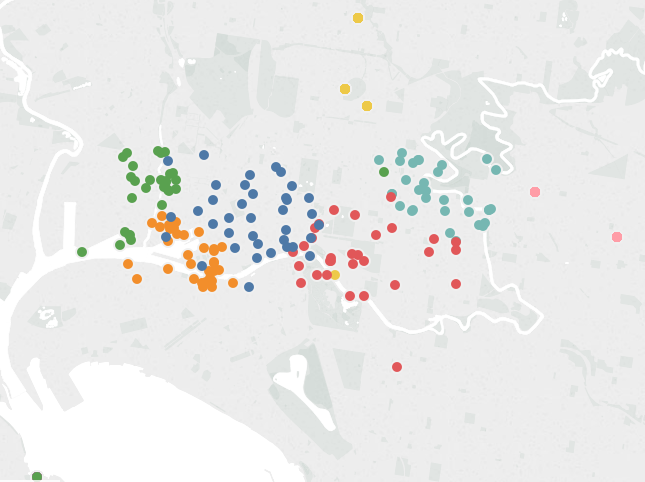

In [26]:
## code to change the Origin Region
df.loc[(df['Unnamed: 0']=='ID1834538109'),'Origin Region'] = 2
df.loc[(df['Unnamed: 0']=='ID5139631941'),'Origin Region'] = 2
df.loc[(df['Unnamed: 0']=='ID1317340367'),'Origin Region'] = 2
df.loc[(df['Unnamed: 0']=='ID3141351739'),'Origin Region'] = 2
df.loc[(df['Unnamed: 0']=='ID1278285441'),'Origin Region'] = 2
df.loc[(df['Unnamed: 0']=='ID1747171831'),'Origin Region'] = 1
df.loc[(df['Unnamed: 0']=='ID5365761825'),'Origin Region'] = 1
df.loc[(df['Unnamed: 0']=='ID1650025002'),'Origin Region'] = 1
df.loc[(df['Unnamed: 0']=='ID1168363288'),'Origin Region'] = 1
df.loc[(df['Unnamed: 0']=='ID3877976721'),'Origin Region'] = 1
df.loc[(df['Unnamed: 0']=='ID1961317003'),'Origin Region'] = 3
df.loc[(df['Unnamed: 0']=='ID3122404394'),'Origin Region'] = 3
df.loc[(df['Unnamed: 0']=='ID1416043076'),'Origin Region'] = 4
df.loc[(df['Unnamed: 0']=='ID1475015649'),'Origin Region'] = 4
df.loc[(df['Unnamed: 0']=='ID5414218968'),'Origin Region'] = 5

Now we follow the same step we have done for the Origin Region and do the same for the Destination Region and we find the wrong vaues for the Destination Region and correct them accordingly.

The Tableu plot for the __Destination Region__ is as follows

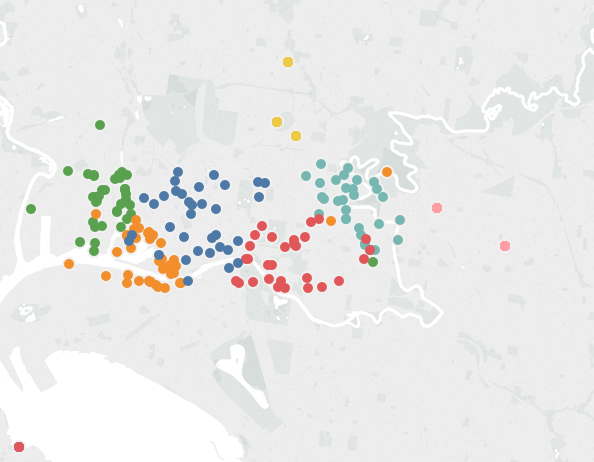

In [27]:
## code to change the Destination Region
df.loc[(df['Unnamed: 0']=='ID1890283662'),'Destination Region'] = 5
df.loc[(df['Unnamed: 0']=='ID1862558846'),'Destination Region'] = 2
df.loc[(df['Unnamed: 0']=='ID1712952978'),'Destination Region'] = 2
df.loc[(df['Unnamed: 0']=='ID1834573345'),'Destination Region'] = 2
df.loc[(df['Unnamed: 0']=='ID3251114902'),'Destination Region'] = 2
df.loc[(df['Unnamed: 0']=='ID3574647240'),'Destination Region'] = 2
df.loc[(df['Unnamed: 0']=='ID3574647240'),'Destination Region'] = 2
df.loc[(df['Unnamed: 0']=='ID3621856361'),'Destination Region'] = 4
df.loc[(df['Unnamed: 0']=='ID1902980383'),'Destination Region'] = 4
df.loc[(df['Unnamed: 0']=='ID3697097085'),'Destination Region'] = 4
df.loc[(df['Unnamed: 0']=='ID3560953687'),'Destination Region'] = 4
df.loc[(df['Unnamed: 0']=='ID3751964934'),'Destination Region'] = 4
df.loc[(df['Unnamed: 0']=='ID1883141120'),'Destination Region'] = 4
df.loc[(df['Unnamed: 0']=='ID1142691882'),'Destination Region'] = 4

Now all the dirty data has been cleaned. We now save the cleaned dataframe to a csv file. Using the same filename the to_csv function of pandas would overwrite the file which already exists. Hence the same filename is used

In [28]:
df.to_csv('29996368_dirty_data_solution.csv')

# Task 2: Wrangling a missing values dataset


## Introduction

In this task of the assignment we have to find the missing values and handle them accordingly. A csv file named missing_values.csv is given to us and we have to correct this data by filling in the missing values.

Our first step to solve this problem would be to import the required libraries. 

In [29]:
import pandas as pd
import numpy as np
import math
import seaborn as snb

Now we would load the dataset into a dataframe using pandas.

In [30]:
df_missing_values = pd.read_csv('29996368_missing_value.csv',delimiter=',',sep='\s*,\s*')
df_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 14 columns):
Unnamed: 0               115 non-null object
Uber Type                94 non-null float64
Origin Region            115 non-null int64
Destination Region       115 non-null int64
Origin Latitude          115 non-null float64
Origin Longitude         115 non-null float64
Destination Latitude     115 non-null float64
Destination Longitude    115 non-null float64
Journey Distance(m)      115 non-null float64
Departure Date           115 non-null object
Departure Time           115 non-null object
Travel Time(s)           115 non-null float64
Arrival Time             115 non-null object
Fare$                    96 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.7+ KB


Now from the dataset information we can see that there are missing values in the 'Uber Type' and 'Fare\$'. There are a total of 115 rows in the dataset and all the columns should have 115 values. However the 'Uber Type' column has only 94 values and the 'Fare\$' column has 96 values. Thus our task now would be to fill in these missing values by finding patterns and models from the dataset.

## Case 1: Handling the missing values of Uber Type

As seen from the dataframe information we can see that there are missing values in the 'Uber Type' column. Now we have to handle this and correct the dataframe. 

If we see the ID and Uber Type for a couple of rides we can find a pattern between this and see that there is a relation between the third character of the ride ID and the Uber Type of every ride. 

__We can see that:__

- If the third character of ID is 1 then Uber Type for the ride is 0
- If the third character of ID is 3 then Uber Type for the ride is 1
- If the third character of ID is 5 then Uber Type for the ride is 2

Hence we can see that by simply converting the third character of the ID to int and by performing an integer division we can find the Uber Type for the respective ride.

In [31]:
# code for finding missing values in the 'Uber Type column and filling them'
for i in range(0,len(df_missing_values)):
    if df_missing_values['Uber Type'][i] == int(df_missing_values['Unnamed: 0'][i][2])//2:
        continue
    else:
        df_missing_values['Uber Type'][i] = int(df_missing_values['Unnamed: 0'][i][2])//2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now after the above code is run all the missing Uber Type values are filled. Hence filling the missing values of one of the column in the missing values is down we have one more to go to accomplish a complete dataset.

Now we drop all the rows with missing Fare value and then we write the data to a csv file

In [32]:
df_missing_values.dropna().to_csv('29996368_missing_UberType_cleaned.csv')

## Case 2: Handling missing values of Fare\$ column

We can see from the data set which is provided that the Fare\$ column also has missing values and we have to fill in the missing values from these column. This is a little complicated as there is no fixed algorithm to find the fare of an Uber Ride. The Fare of a ride would depend on various factors like time of the day, day of the week, Uber Type and distance of travel for the ride.

For predecting the fare we use machine learning consepts and linear regression is used for predection of the fare.

Our first step now would be to add the columns which would help in prediction of the uber fare for each ride. Day of the week is one of the parameter which would help in the predection of an Uber ride. If the day is a weekday then the fare would be slightly less than the fares over weekends. Hence we use a library called 'datetime' which would help in conversion of date to a day value. Then based on the day we create a list and append a 1 or a 0.

In [33]:
import datetime
day =[]
for i in df_missing_values.index:
    datei = df_missing_values['Departure Date'][i]
    dayi = datetime.datetime.strptime(datei, '%Y-%m-%d').weekday()
    if dayi<5:
        day.append(0)
    else:
        day.append(1)

Now that we have the day_of_week values in a list we can attach it as a row to the dataframe.

In [34]:
df_missing_values['day_of_week'] = day

Similarly time of the day is also one important parameter which would affect the fare of an uber ride. Hence according to the assignment requirements there are three time slots made and then based on the time slots a constant value is appended to the list.

In [35]:
time_of_day = []
for i in df_missing_values.index:
    departure_time_split = df_missing_values['Departure Time'][i].split(":")
    departure_time = int(departure_time_split[0])
    if 6<=departure_time<=11:
        time_of_day.append(0)
    elif 12<=departure_time<=20:
        time_of_day.append(1)
    else:
        time_of_day.append(2)

Now that we have the time of the day list we would append this list to the dataframe.

In [36]:
df_missing_values['time_of_day'] = time_of_day

In [37]:
df_missing_values.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day
0,ID1158214067,0.0,6,1,-37.787442,144.980409,-37.799743,144.972465,1964.0,2018-07-09,19:45:26,495.96,19:53:41,7.05,0,1
1,ID5743777261,2.0,2,3,-37.823056,144.942479,-37.821467,144.968992,2749.0,2018-04-18,14:28:41,691.38,14:40:12,67.09,0,1
2,ID3415103695,1.0,7,1,-37.861835,144.905716,-37.809547,144.939497,10738.0,2018-03-08,12:27:38,3475.92,13:25:33,19.51,0,1
3,ID1580893576,0.0,4,8,-37.803710,145.011618,-37.807202,145.026637,1390.0,2018-01-11,17:06:44,368.88,17:12:52,6.33,0,1
4,ID1978988746,0.0,9,1,-38.110916,144.654173,-37.808196,144.973306,44547.0,2018-03-22,01:36:27,10764.84,4:35:51,26.50,0,2


Now using this model we have to predict the fare for the missing values. Hence the dataframe is now split into a test data as shown below. The test data is basically the data for which the fare value in the dataframe is not a null value.

In [38]:
test_data = df_missing_values[df_missing_values['Fare$'].isnull()]
test_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day
61,ID5497711606,2.0,6,7,-37.790818,144.985793,-37.861835,144.905716,11712.0,2018-01-14,22:09:28,3717.48,23:11:25,NaN,1,2
69,ID1332158222,0.0,2,1,-37.813849,144.933020,-37.814079,144.960108,3552.0,2018-02-13,16:46:10,915.00,17:01:25,NaN,0,1
72,ID5857179305,2.0,7,6,-37.861835,144.905716,-37.773845,144.983689,13169.0,2018-07-19,16:15:21,3863.58,17:19:44,NaN,0,1
77,ID1903512008,0.0,6,1,-37.787442,144.980409,-37.809187,144.945239,5185.0,2018-04-13,20:09:23,1330.56,20:31:33,NaN,0,1
79,ID1710088236,0.0,4,2,-37.813735,145.006257,-37.812655,144.925244,7996.0,2018-03-14,03:01:10,2103.66,3:36:13,NaN,0,2


Now we have the test data thus now we have to obtain the training data as well. The train data is the data for which we have null values in the fare column.

In [39]:
train_data = df_missing_values.dropna()
train_data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day
0,ID1158214067,0.0,6,1,-37.787442,144.980409,-37.799743,144.972465,1964.0,2018-07-09,19:45:26,495.96,19:53:41,7.05,0,1
1,ID5743777261,2.0,2,3,-37.823056,144.942479,-37.821467,144.968992,2749.0,2018-04-18,14:28:41,691.38,14:40:12,67.09,0,1
2,ID3415103695,1.0,7,1,-37.861835,144.905716,-37.809547,144.939497,10738.0,2018-03-08,12:27:38,3475.92,13:25:33,19.51,0,1
3,ID1580893576,0.0,4,8,-37.803710,145.011618,-37.807202,145.026637,1390.0,2018-01-11,17:06:44,368.88,17:12:52,6.33,0,1
4,ID1978988746,0.0,9,1,-38.110916,144.654173,-37.808196,144.973306,44547.0,2018-03-22,01:36:27,10764.84,4:35:51,26.50,0,2


Now only a few specific columns are required to train the model for linear regression. Hence these specific columns are segregated out.

In [40]:
train_data = train_data[['Uber Type', 'Journey Distance(m)','Travel Time(s)','day_of_week','time_of_day','Fare$']]

Now we import the library for performing linear regression.

In [41]:
from sklearn.linear_model import LinearRegression

Now we do the predections for the fare for the uber type. In this part we would segregate the training data based on the Uber Type of the ride and train the models. Then these models would be used to predict the fares for their respective Uber types. This increases the accuracy of the model and more accurate fares would be predicted for each uber rides.

In [42]:
from sklearn.model_selection import train_test_split
predectionsall = []

for i in range(3):
    train_data_i = train_data[train_data['Uber Type'] == i]
    test_data_i = test_data[test_data['Uber Type'] == i]
    X = train_data_i[train_data_i.columns[0:5]]
    y = train_data_i['Fare$']
    Xtrain = X
    ytrain = y
    Xtest = test_data_i[['Uber Type','Journey Distance(m)','Travel Time(s)','day_of_week','time_of_day']]
    lm_full = LinearRegression()
    lm_full.fit(Xtrain,ytrain)
    predections = lm_full.predict(Xtest)
    predectionsall.append(list(predections))



Now that we have the predicted fare values in a list we would use it for handling the missing fare values in the dataset.

In [43]:
zero_type = 0
one_type = 0
two_type = 0
for i in df_missing_values[df_missing_values['Fare$'].isnull()].index:
    if df_missing_values['Uber Type'][i] == 0:
        df_missing_values['Fare$'][i] = predectionsall[0][zero_type]
        zero_type+=1
    if df_missing_values['Uber Type'][i] == 1:
        df_missing_values['Fare$'][i] = predectionsall[1][one_type]
        one_type+=1
    if df_missing_values['Uber Type'][i] == 2:
        df_missing_values['Fare$'][i] = predectionsall[2][two_type]
        two_type+=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
df_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 16 columns):
Unnamed: 0               115 non-null object
Uber Type                115 non-null float64
Origin Region            115 non-null int64
Destination Region       115 non-null int64
Origin Latitude          115 non-null float64
Origin Longitude         115 non-null float64
Destination Latitude     115 non-null float64
Destination Longitude    115 non-null float64
Journey Distance(m)      115 non-null float64
Departure Date           115 non-null object
Departure Time           115 non-null object
Travel Time(s)           115 non-null float64
Arrival Time             115 non-null object
Fare$                    115 non-null float64
day_of_week              115 non-null int64
time_of_day              115 non-null int64
dtypes: float64(8), int64(4), object(4)
memory usage: 14.5+ KB


Now we have to remove the rows which we have created for predecting thr fares.

In [45]:
df_missing_values.drop(labels=['day_of_week','time_of_day'],axis=1,inplace=True)

In [46]:
df_missing_values.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1158214067,0.0,6,1,-37.787442,144.980409,-37.799743,144.972465,1964.0,2018-07-09,19:45:26,495.96,19:53:41,7.05
1,ID5743777261,2.0,2,3,-37.823056,144.942479,-37.821467,144.968992,2749.0,2018-04-18,14:28:41,691.38,14:40:12,67.09
2,ID3415103695,1.0,7,1,-37.861835,144.905716,-37.809547,144.939497,10738.0,2018-03-08,12:27:38,3475.92,13:25:33,19.51
3,ID1580893576,0.0,4,8,-37.803710,145.011618,-37.807202,145.026637,1390.0,2018-01-11,17:06:44,368.88,17:12:52,6.33
4,ID1978988746,0.0,9,1,-38.110916,144.654173,-37.808196,144.973306,44547.0,2018-03-22,01:36:27,10764.84,4:35:51,26.50


Now from the above information of the dataset we can see that we dont have any null values on the dataset. Hence all the null values are handeled in the best possible manner.

In [47]:
df_missing_values.to_csv('29996368.missing_value_solution.csv')

# Task 3: Finding Outliers and removing them


In this task we have to remove the outliers from the data which is present in the outliers file. 

For removing the outliers from the data we would use linear regression for predecting the fares of the data. Then we would use the files which are created from the task 1 and task 2 of this assignment and then use this to train the linear regression model. Then we predict the fares on the training data and find the difference in the fares between the predicted fares and the actual fares which is there in the data. After this we find the mean and standard deviation values for each uber types and using this we find the outliers

Our first step in this task is to import all the required libraries for this task.

In [48]:
import pandas as pd
import numpy as np
import seaborn as snb
import re

Now the next step which we do is to load all the data data which is the solution of the dirty_data and the missing values with corrected uber type values only.

In [49]:
df_missing_cleaned = pd.read_csv('29996368_missing_UberType_cleaned.csv')
df_dirty_cleaned = pd.read_csv('29996368_dirty_data_solution.csv')

Now our third step would be to import the outliers file which is given for the assignment

In [50]:
df_outliers = pd.read_csv('29996368_outliers.csv')

In [51]:
df_dirty_missing = pd.concat([df_dirty_cleaned.reset_index(drop = True),df_missing_cleaned])

## Training a Linear Regression model

Now we use the new created dataframe for training a linear regression model

### Finding Fare Residuals for the data which is obtained from previous tasks

Now we have to find wether each uber ride is happening during the weekday or during a weekend. This can be found out from the departure date

In [52]:
df_dirty_missing.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID3926512548,1.0,7,2,-37.861835,144.905716,-37.824373,144.952511,8304.0,2018-02-03,17:12:43,2929.02,18:1:33,27.66
1,1,ID5632779567,2.0,2,1,-37.823915,144.929916,-37.813703,144.953459,3408.0,2018-01-04,19:12:05,881.64,19:26:47,106.43
2,2,ID1815008795,0.0,1,9,-37.812248,144.957594,-38.110916,144.654173,43128.0,2018-06-24,12:22:20,10438.14,15:16:19,19.93
3,3,ID5666968193,2.0,5,9,-37.804927,144.939491,-38.110916,144.654173,43455.0,2018-01-20,17:27:50,10437.48,20:21:48,1031.39
4,4,ID3141351739,1.0,2,7,-37.812067,144.938196,-37.861835,144.905716,10817.0,2018-01-16,17:22:34,3501.60,18:20:56,24.35


In [53]:
df_dirty_missing.reset_index(inplace=True)

In [54]:
import datetime
day =[]
for i in df_dirty_missing.index:
    datei = df_dirty_missing['Departure Date'][i]
    dayi = datetime.datetime.strptime(datei, '%Y-%m-%d').weekday()
    if dayi<5:
        day.append(0)
    else:
        day.append(1)

In [55]:
df_dirty_missing['day_of_week'] = day

Now similarly for each uber ride we find the time of the ride and then classify it accordingly into morning, evening and night rides. These parameters would help in training a model for linear regression

In [56]:
time_of_day = []
for i in df_dirty_missing.index:
    departure_time_split = df_dirty_missing['Departure Time'][i].split(":")
    departure_time = int(departure_time_split[0])
    if 6<=departure_time<=11:
        time_of_day.append(0)
    elif 12<=departure_time<=20:
        time_of_day.append(1)
    else:
        time_of_day.append(2)

In [57]:
df_dirty_missing['time_of_day'] = time_of_day

In [58]:
df_dirty_missing.head()

,index,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day
0,0,0,ID3926512548,1.0,7,2,-37.861835,144.905716,-37.824373,144.952511,8304.0,2018-02-03,17:12:43,2929.02,18:1:33,27.66,1,1
1,1,1,ID5632779567,2.0,2,1,-37.823915,144.929916,-37.813703,144.953459,3408.0,2018-01-04,19:12:05,881.64,19:26:47,106.43,0,1
2,2,2,ID1815008795,0.0,1,9,-37.812248,144.957594,-38.110916,144.654173,43128.0,2018-06-24,12:22:20,10438.14,15:16:19,19.93,1,1
3,3,3,ID5666968193,2.0,5,9,-37.804927,144.939491,-38.110916,144.654173,43455.0,2018-01-20,17:27:50,10437.48,20:21:48,1031.39,1,1
4,4,4,ID3141351739,1.0,2,7,-37.812067,144.938196,-37.861835,144.905716,10817.0,2018-01-16,17:22:34,3501.60,18:20:56,24.35,0,1


Now we have to predict the fares for the data which is taken after wrangling the dirty_data and missing_data files.

In [59]:
df_dirty_missing['Fare_Predicted'] = np.nan

In [60]:
train_data = df_dirty_missing

In [61]:
train_data = train_data[['Uber Type', 'Journey Distance(m)','Travel Time(s)','day_of_week','time_of_day','Fare$']]

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
test_data = df_dirty_missing

Now we train a model and then predict the fare values for the data.

In [64]:
from sklearn.model_selection import train_test_split
predectionsall = []

for i in range(3):
    train_data_i = train_data[train_data['Uber Type'] == i]
    test_data_i = test_data[test_data['Uber Type'] == i]
    X = train_data_i[train_data_i.columns[0:5]]
    y = train_data_i['Fare$']
    Xtrain = X
    ytrain = y
    Xtest = test_data_i[['Uber Type','Journey Distance(m)','Travel Time(s)','day_of_week','time_of_day']]
    lm_full = LinearRegression()
    lm_full.fit(Xtrain,ytrain)
    predections = lm_full.predict(Xtest)
    predectionsall.append(list(predections))



In [65]:
zero_type = 0
one_type = 0
two_type = 0
for i in df_dirty_missing.index:
    if df_dirty_missing['Uber Type'][i] == 0:
        df_dirty_missing['Fare_Predicted'][i] = predectionsall[0][zero_type]
        zero_type+=1
    if df_dirty_missing['Uber Type'][i] == 1:
        df_dirty_missing['Fare_Predicted'][i] = predectionsall[1][one_type]
        one_type+=1
    if df_dirty_missing['Uber Type'][i] == 2:
        df_dirty_missing['Fare_Predicted'][i] = predectionsall[2][two_type]
        two_type+=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now we find the difference between the predicted fare and the actual fare and then take the absolute value of this. This is the fare residual value.

In [66]:
df_dirty_missing['Fare_Difference'] = np.nan

In [67]:
for i in df_dirty_missing.index:
    df_dirty_missing['Fare_Difference'][i] = abs(df_dirty_missing['Fare_Predicted'][i]-df_dirty_missing['Fare$'][i])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
df_dirty_missing.head()

,index,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day,Fare_Predicted,Fare_Difference
0,0,0,ID3926512548,1.0,7,2,-37.861835,144.905716,-37.824373,144.952511,8304.0,2018-02-03,17:12:43,2929.02,18:1:33,27.66,1,1,25.724972,1.935028
1,1,1,ID5632779567,2.0,2,1,-37.823915,144.929916,-37.813703,144.953459,3408.0,2018-01-04,19:12:05,881.64,19:26:47,106.43,0,1,126.811311,20.381311
2,2,2,ID1815008795,0.0,1,9,-37.812248,144.957594,-38.110916,144.654173,43128.0,2018-06-24,12:22:20,10438.14,15:16:19,19.93,1,1,22.473279,2.543279
3,3,3,ID5666968193,2.0,5,9,-37.804927,144.939491,-38.110916,144.654173,43455.0,2018-01-20,17:27:50,10437.48,20:21:48,1031.39,1,1,959.122240,72.267760
4,4,4,ID3141351739,1.0,2,7,-37.812067,144.938196,-37.861835,144.905716,10817.0,2018-01-16,17:22:34,3501.60,18:20:56,24.35,0,1,24.114952,0.235048


## Finding the threshold values which would help us in finding the outliers

Now we find the mean and standard deviation of the fare residual values based on the uber type.

In [69]:
mean_0= np.mean(df_dirty_missing[df_dirty_missing['Uber Type']==0]['Fare_Difference'])
mean_1= np.mean(df_dirty_missing[df_dirty_missing['Uber Type']==1]['Fare_Difference'])
mean_2= np.mean(df_dirty_missing[df_dirty_missing['Uber Type']==2]['Fare_Difference'])
sd_0=   np.std(df_dirty_missing[df_dirty_missing['Uber Type']==0]['Fare_Difference'])
sd_1=   np.std(df_dirty_missing[df_dirty_missing['Uber Type']==1]['Fare_Difference'])
sd_2=   np.std(df_dirty_missing[df_dirty_missing['Uber Type']==2]['Fare_Difference'])

Now that we have the mean and standard deviation of the fare residuals based on the Uber type, we can tell that is a fare is within the 3 standard deviations then it could be a possibly correct value. However if it is not in this range then we can consider as an outlier. 

Hence we find the lower and upper limit threshold of the fare for each uber type. Now if a predicted fare is within this range then it can be considered as a possibly correct value and if it is out of this range then it could be a incorrect value.

In [70]:
lower_0 = mean_0 - (3 * sd_0)
upper_0 = mean_0 + (3 * sd_0)
lower_1 = mean_1 - (3 * sd_1)
upper_1 = mean_1 + (3 * sd_1)
lower_2 = mean_2 - (3 * sd_2)
upper_2 = mean_2 + (3 * sd_2)

## Finding the Fare residuals for the outliers dataset

Now we have to predict the fares and find the residual for the outliers dataset whic we have. This dataset is the outliers file which is given for task 3 of the assignment

In a similar way we have done for the previous dataset we perform the same steps to get the time_of_day, day_of_week, predicted fare and the fare_difference values.

This part of the code is to find the day of the week for the values in outliers dataset. This finds wether the ride was taken on a weekday or weekend.

In [71]:
import datetime
day =[]
for i in df_outliers.index:
    datei = df_outliers['Departure Date'][i]
    dayi = datetime.datetime.strptime(datei, '%Y-%m-%d').weekday()
    if dayi<5:
        day.append(0)
    else:
        day.append(1)

In [72]:
df_outliers['day_of_week'] = day

Now similarly we find out what time of the day the ride was taken in and accordingly segregate the rows.

In [73]:
time_of_day = []
for i in df_outliers.index:
    departure_time_split = df_outliers['Departure Time'][i].split(":")
    departure_time = int(departure_time_split[0])
    if 6<=departure_time<=11:
        time_of_day.append(0)
    elif 12<=departure_time<=20:
        time_of_day.append(1)
    else:
        time_of_day.append(2)

In [74]:
df_outliers['time_of_day'] = time_of_day

In [75]:
df_outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day
0,0,ID1530894700,0,2,1,-37.818009,144.948597,-37.805406,144.974466,3102.0,2018-04-03,06:38:46,736.32,6:51:02,4.48,0,0
1,1,ID1778027030,0,5,6,-37.810039,144.904753,-37.787433,144.980377,8639.0,2018-05-13,14:15:10,2352.90,14:54:22,15.68,1,1
2,2,ID1599873860,0,9,3,-38.110916,144.654173,-37.811763,144.985371,45570.0,2018-06-11,12:48:54,10891.32,15:50:25,19.12,0,1
3,3,ID3723667905,1,8,4,-37.807202,145.026637,-37.805037,144.992731,3202.0,2018-03-01,02:09:08,824.64,2:22:52,9.11,0,2
4,4,ID5797495055,2,2,3,-37.818128,144.929477,-37.823244,144.968767,4338.0,2018-07-23,00:42:44,1063.86,1:00:27,112.48,0,2


the test data now is the outliers file which is given to us.

In [76]:
test_data = df_outliers

In [77]:
train_data.head()

,Uber Type,Journey Distance(m),Travel Time(s),day_of_week,time_of_day,Fare$
0,1.0,8304.0,2929.02,1,1,27.66
1,2.0,3408.0,881.64,0,1,106.43
2,0.0,43128.0,10438.14,1,1,19.93
3,2.0,43455.0,10437.48,1,1,1031.39
4,1.0,10817.0,3501.60,0,1,24.35


Now in a similar manner we would predict the fare values for the outliers dataset.

In [78]:
from sklearn.model_selection import train_test_split
predectionsall = []

for i in range(3):
    train_data_i = train_data[train_data['Uber Type'] == i]
    test_data_i = test_data[test_data['Uber Type'] == i]
    X = train_data_i[train_data_i.columns[0:5]]
    y = train_data_i['Fare$']
    Xtrain = X
    ytrain = y
    Xtest = test_data_i[['Uber Type','Journey Distance(m)','Travel Time(s)','day_of_week','time_of_day']]
    lm_full = LinearRegression()
    lm_full.fit(Xtrain,ytrain)
    predections = lm_full.predict(Xtest)
    predectionsall.append(list(predections))



Now we would create a column named Fare_Predicted in the outliers dataset and fill in the predicted values accordingly.

In [79]:
df_outliers['Fare_Predicted'] = np.nan

In [80]:
zero_type = 0
one_type = 0
two_type = 0
for i in df_outliers.index:
    if df_outliers['Uber Type'][i] == 0:
        df_outliers['Fare_Predicted'][i] = predectionsall[0][zero_type]
        zero_type+=1
    if df_outliers['Uber Type'][i] == 1:
        df_outliers['Fare_Predicted'][i] = predectionsall[1][one_type]
        one_type+=1
    if df_outliers['Uber Type'][i] == 2:
        df_outliers['Fare_Predicted'][i] = predectionsall[2][two_type]
        two_type+=1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [81]:
df_outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day,Fare_Predicted
0,0,ID1530894700,0,2,1,-37.818009,144.948597,-37.805406,144.974466,3102.0,2018-04-03,06:38:46,736.32,6:51:02,4.48,0,0,4.874291
1,1,ID1778027030,0,5,6,-37.810039,144.904753,-37.787433,144.980377,8639.0,2018-05-13,14:15:10,2352.90,14:54:22,15.68,1,1,14.466714
2,2,ID1599873860,0,9,3,-38.110916,144.654173,-37.811763,144.985371,45570.0,2018-06-11,12:48:54,10891.32,15:50:25,19.12,0,1,18.451411
3,3,ID3723667905,1,8,4,-37.807202,145.026637,-37.805037,144.992731,3202.0,2018-03-01,02:09:08,824.64,2:22:52,9.11,0,2,17.450457
4,4,ID5797495055,2,2,3,-37.818128,144.929477,-37.823244,144.968767,4338.0,2018-07-23,00:42:44,1063.86,1:00:27,112.48,0,2,146.045833


Now we would find the fare residuals for the outliers dataset. This is done by taking the difference between the predicted fares and the given fares in the outliers dataset

In [82]:
df_outliers['Fare_Difference'] = np.nan

In [83]:
for i in df_outliers.index:
    df_outliers['Fare_Difference'][i] = abs(df_outliers['Fare_Predicted'][i]-df_outliers['Fare$'][i])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
df_outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day,Fare_Predicted,Fare_Difference
0,0,ID1530894700,0,2,1,-37.818009,144.948597,-37.805406,144.974466,3102.0,2018-04-03,06:38:46,736.32,6:51:02,4.48,0,0,4.874291,0.394291
1,1,ID1778027030,0,5,6,-37.810039,144.904753,-37.787433,144.980377,8639.0,2018-05-13,14:15:10,2352.90,14:54:22,15.68,1,1,14.466714,1.213286
2,2,ID1599873860,0,9,3,-38.110916,144.654173,-37.811763,144.985371,45570.0,2018-06-11,12:48:54,10891.32,15:50:25,19.12,0,1,18.451411,0.668589
3,3,ID3723667905,1,8,4,-37.807202,145.026637,-37.805037,144.992731,3202.0,2018-03-01,02:09:08,824.64,2:22:52,9.11,0,2,17.450457,8.340457
4,4,ID5797495055,2,2,3,-37.818128,144.929477,-37.823244,144.968767,4338.0,2018-07-23,00:42:44,1063.86,1:00:27,112.48,0,2,146.045833,33.565833


## Dropping the outliers based on the threshold

In [85]:
for i in df_outliers[df_outliers['Uber Type'] == 0].index:
    if df_outliers['Fare_Difference'][i] < lower_0 or df_outliers['Fare_Difference'][i] > upper_0:
        df_outliers.drop(df_outliers[df_outliers['Fare_Difference']==df_outliers['Fare_Difference'][i]].index, inplace=True)

In [86]:
for i in df_outliers[df_outliers['Uber Type'] == 1].index:
    if df_outliers['Fare_Difference'][i] < lower_1 or df_outliers['Fare_Difference'][i] > upper_1:
        df_outliers.drop(df_outliers[df_outliers['Fare_Difference']==df_outliers['Fare_Difference'][i]].index, inplace=True)

In [87]:
for i in df_outliers[df_outliers['Uber Type'] == 2].index:
    if df_outliers['Fare_Difference'][i] < lower_2 or df_outliers['Fare_Difference'][i] > upper_2:
        df_outliers.drop(df_outliers[df_outliers['Fare_Difference']==df_outliers['Fare_Difference'][i]].index, inplace=True)

In [88]:
df_outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,day_of_week,time_of_day,Fare_Predicted,Fare_Difference
0,0,ID1530894700,0,2,1,-37.818009,144.948597,-37.805406,144.974466,3102.0,2018-04-03,06:38:46,736.32,6:51:02,4.48,0,0,4.874291,0.394291
1,1,ID1778027030,0,5,6,-37.810039,144.904753,-37.787433,144.980377,8639.0,2018-05-13,14:15:10,2352.90,14:54:22,15.68,1,1,14.466714,1.213286
2,2,ID1599873860,0,9,3,-38.110916,144.654173,-37.811763,144.985371,45570.0,2018-06-11,12:48:54,10891.32,15:50:25,19.12,0,1,18.451411,0.668589
3,3,ID3723667905,1,8,4,-37.807202,145.026637,-37.805037,144.992731,3202.0,2018-03-01,02:09:08,824.64,2:22:52,9.11,0,2,17.450457,8.340457
4,4,ID5797495055,2,2,3,-37.818128,144.929477,-37.823244,144.968767,4338.0,2018-07-23,00:42:44,1063.86,1:00:27,112.48,0,2,146.045833,33.565833


Now in the next step we would drop the columns which we have created for dropping the outliers in the outliers dataset.

In [89]:
df_outliers.drop(labels=['time_of_day','day_of_week','Fare_Predicted','Fare_Difference','Unnamed: 0'],axis=1,inplace=True)

In [90]:
df_outliers.head()

,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1530894700,0,2,1,-37.818009,144.948597,-37.805406,144.974466,3102.0,2018-04-03,06:38:46,736.32,6:51:02,4.48
1,ID1778027030,0,5,6,-37.810039,144.904753,-37.787433,144.980377,8639.0,2018-05-13,14:15:10,2352.90,14:54:22,15.68
2,ID1599873860,0,9,3,-38.110916,144.654173,-37.811763,144.985371,45570.0,2018-06-11,12:48:54,10891.32,15:50:25,19.12
3,ID3723667905,1,8,4,-37.807202,145.026637,-37.805037,144.992731,3202.0,2018-03-01,02:09:08,824.64,2:22:52,9.11
4,ID5797495055,2,2,3,-37.818128,144.929477,-37.823244,144.968767,4338.0,2018-07-23,00:42:44,1063.86,1:00:27,112.48


Now All the outliers from the file have been dropped thus we can write the dataframe to a new csv file.

In [91]:
df_outliers.to_csv('29996368_outliers_solution.csv')